# Calcium Flex Analysis using Python #

*Author Lawrence Collins*

A step-by-step guide on how to analyse flex data via the use of a bespoke Python package. This notebook contains all the information on how to get started using the software; with further details contained in the documentation.<br><br>If you are new to the program I would recommend going through this notebook and executing each cell containing the code one at a time. Have a play around with the functions to get a feel for how things work. All of the code is hidden behind the scenes leaving the user with a selection of simple commands that carry out highly customisable operations on their assay data.

# Single plate processing #

## Importing the package ##
The Jupyter Notebook gains access to the Calcium Flex package via Python's import system. Execute the following cell (ctrl+enter) to add the calcium flex analysis functionality to the notebook.

In [1]:
from calciumflexanalysis import calcium_flex as cal

## Uploading Flex data ##
For each plate, the package requires the raw data .txt file and a corresponding plate map. The plate map contains a description of each well of the assay, allowing easy categorisation the data.<br><br>
Within the function 'calciumflexanalysis.CaFlexPlate', the user must stipulate several constraints, additional (optional) attributes can also be stated.

#### Mandatory ####
```
 - raw_data: The raw data .txt file
 - plate_map_file: The plate map .csv file, adhering to either the 'short' or 'long' template
 - inject: The time at which the agonist (e.g. englerin A) was injected into the assay
 - data_type: The type of data file being used, described using the colloquial terms 'new' and 'old'
```
#### Optional ####
```
 - map_type: The type of plate map template being used, 'short' or 'long' - defaults to 'short'
 - size: Size of the well plate - defaults to 96
 - valid: Validates all wells in the assay - defaults to True
 - title: Title of the assay
```

In [2]:
# text file to be read in (raw file from machine)
datafile = '291019 TPC4sYFP2 EA 30 nM act IBP74 inhib 3 nM to 3 uM.txt' 

# plate map csv file updated by user (either the 'short' or 'long' template)
mapcsv = 'EA 30 nM act IBP74 3nM to 3 uM.csv' 

# insert the 2 files into the 'CaFlexAnalysis' class 
# it is recommended the user name the plates via the system 'plate1', 'plate2', etc.
plate1 = cal.CaFlexPlate(raw_data = datafile, plate_map_file = mapcsv, inject = 60, data_type = 'new')

## Visual inspection ##
Two functions assist the user in checking the arrangment of the well plate and for any anomalous readings.<br>
### see_plate() ###
'see_plate' allows the user to quickly confirm whether they have correctly updated the plate map template. The label and color coding can be customised using the attributes 'labelby' and 'colorby', defaulting to 'Type'. 

C:\Users\lawre\Documents\PROJECT\platemapping\plate_map.py:280: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(grid[(ord(platemap['Row'].iloc[i].lower())-96), ((platemap['Column'].iloc[i]))])


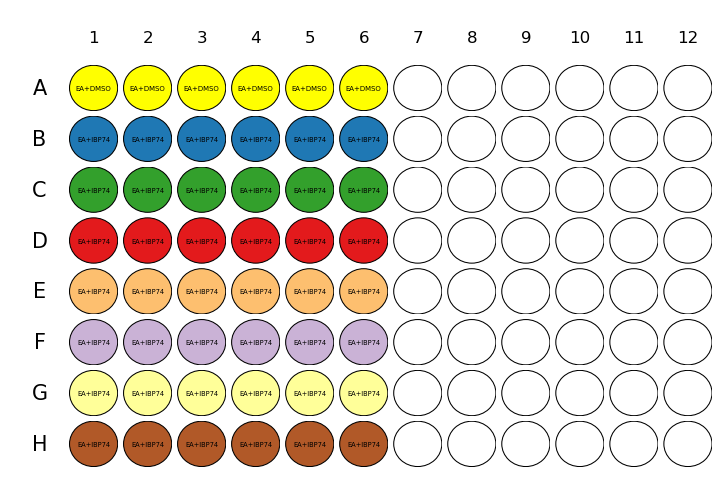

In [3]:
plate1.see_plate(colorby = 'Concentration', labelby = 'Contents')

### visualise_assay() ###
'visualise assay', like see_plate(), provides a simple visual check for the user. The function is different, and more useful, in that it plots the raw data for each well across the assay. Again, the user can stipulate the arguments 'colorby' and 'labelby'. The user must also explicitly state whether the y axis will be shared across the entire assay, using 'share_y = True' or 'share_y = False'.

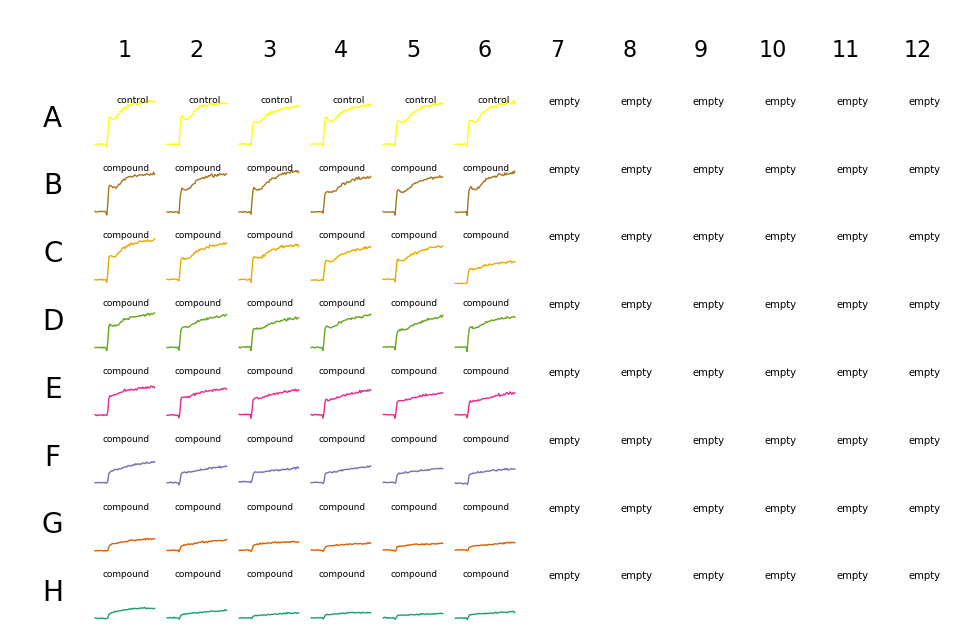

In [4]:
plate1.visualise_assay(share_y = True, colorby = 'Concentration')

### a quick side note ###
If you would like more information about a specific function, simply call help on it as follows:

In [5]:
help(cal.CaFlexPlate.see_plate)

Help on function see_plate in module calciumflexanalysis.calcium_flex:

see_plate(self, title='', export=False, colormap='Paired', colorby='Type', labelby='Type', dpi=150)
    Returns a visual representation of the plate map.
    
    The label and colour for each well can be customised to be a variable, for example 'Compound', 'Protein', 'Concentration', 'Concentration Units', 'Contents' or 'Type'. The size of the plate map used to generate the figure can be either 6, 12, 24, 48, 96 or 384. 
    :param size: Size of platemap, 6, 12, 24, 48, 96 or 384, default = 96
    :type size: int    
    :param export: If 'True' a .png file of the figure is saved, default = False
    :type export: bool
    :param title: Sets the title of the figure, optional
    :type title: str
    :param colormap: Sets the colormap for the color-coding, default = 'Paired'
    :type colormap: str
    :param colorby: Chooses the parameter to color code by, for example 'Type', 'Contents', 'Concentration', 'Compound

Note how you first call the package 'cal', then the class object - in this instance 'CaFlexPlate' - and then the module you require more information on 'see_plate'.

## Invalidation ##
Visualising the assay allows the user to note any anomalous recordings. The user can then choose to have a closer look at the dodgy data and invalidate if necessary. 

### see_wells() ###
'see_wells()' plots the raw data of specific wells from the assay. The user can again label, color and share the y axes of the plots as they see fit.

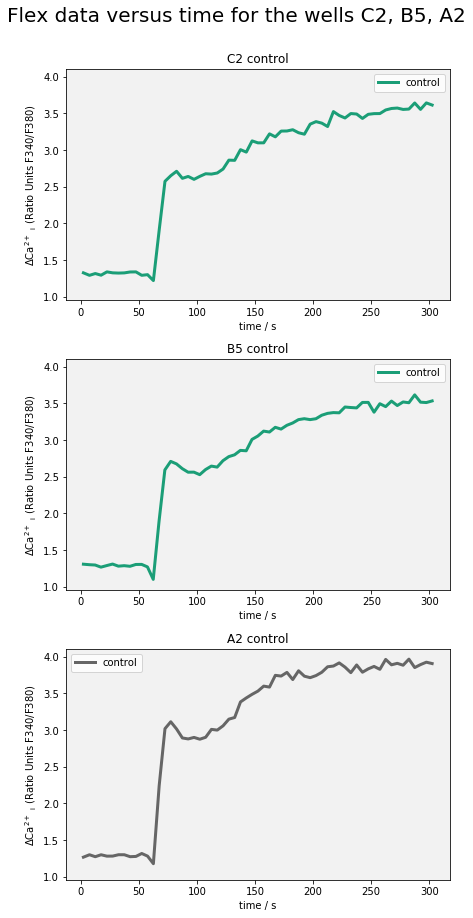

In [6]:
# specific wells that look dodgy
dodgy = "C2", "B5", "A2"

plate1.see_wells(dodgy)

The user can invalidate individual wells or entire rows and columns.

In [7]:
plate1.invalidate_wells(dodgy)

plate1.invalidate_rows('B')

plate1.invalidate_cols(6)

Visualising the assays will clearly show which wells are now invalidated.

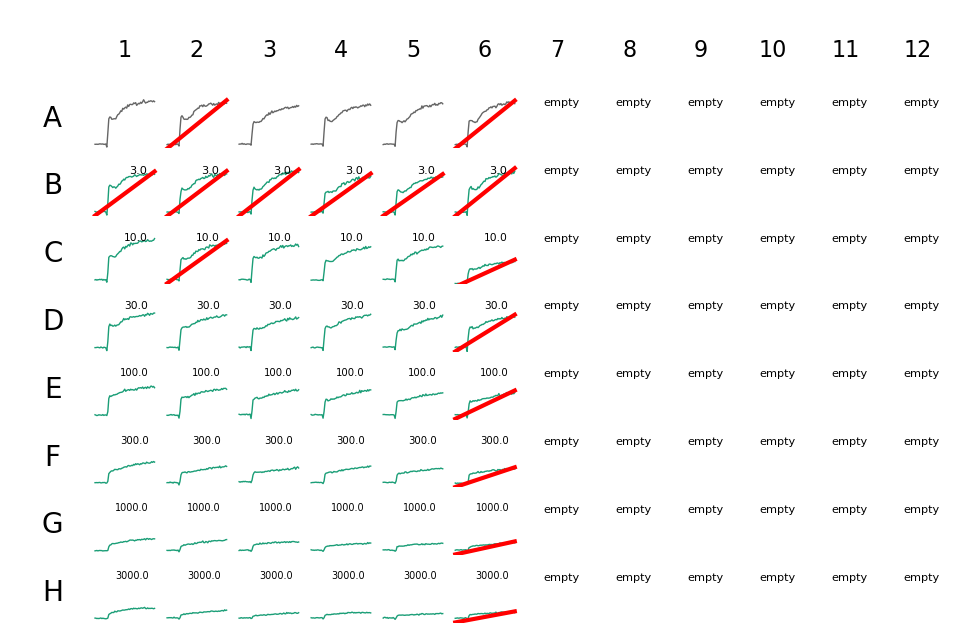

In [8]:
plate1.visualise_assay(labelby = 'Concentration', share_y = True) 

## Data Analysis ##
### Baseline Correction: baseline_correct() ###
The user can now baseline correct the data if they wish. 

In [9]:
plate1.baseline_correct()

### get_window() ###
The program can automatically find the flattest mean gradient across the plate within a 10 point window for the following plateau calculations. The user can stipulate what data the window will be calculated from, either 'ratio' or 'baseline_corrected'

In [10]:
plate1.get_window('baseline_corrected')

### def_window() ###
If the user does not deem the calculated window suitable, it is possible to manually define the point from which the response amplitudes will be calculated. The user must state the *start* time point and the data from which the window will be taken, 'ratio' or 'baseline_corrected'.

In [11]:
# # uncomment to manually set the window
# plate1.def_window(200, 'baseline_corrected')
plate1.window # .window returns the index from which the window will be taken

(41, 51)

### plot_conditions() ###
'plot_conditions' plots the change in calcium flux for each mean condition versus time. The user can define which data will be plotted, either 'ratio' or 'baseline_corrected'. The window from which the response amplitude will be calculated can also be shown on the graph, using show_window = True.

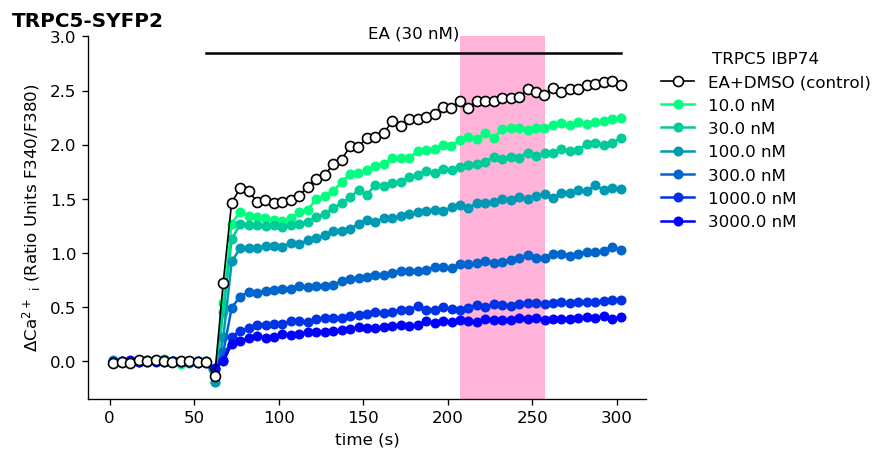

In [12]:
plate1.plot_conditions('baseline_corrected', activator = "EA (30 nM)", title = 'TRPC5-SYFP2', show_window = True, control = True)


### Amplitudes ###
'amplitude()' calculates the response amplitude of each well. Again, the user must specify which data they want to use. 

In [13]:
plate1.amplitude('baseline_corrected')

### Normalisation ###
If the user so desires, they can normalise their data to the plate control.

In [14]:
plate1.normalise()

C:\Users\lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,amps_normed
A1,108.834540
A2,105.504673
A3,93.578189
A4,96.817088
A5,100.770183
...,...
H8,NaN
H9,NaN
H10,NaN
H11,NaN


### mean_amplitude() ###
Amplitudes for each condition are collected and averaged. The user can chose whether they use the normalised data. Note - the user is not required to carry out this step for the following plots, however it may be useful for the user to be able to quickly access the calculated values.

In [15]:
plate1.mean_amplitude(use_normalised = True)

C:\Users\lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Protein,Type,Compound,Concentration,Concentration Units,amps_normed,amps_normed_error
0,-1,empty,-1,-1.0,-1,NaN,NaN
1,TRPC5,compound,IBP74,10.0,nM,86.904522,4.560717
2,TRPC5,compound,IBP74,30.0,nM,76.739513,2.256724
3,TRPC5,compound,IBP74,100.0,nM,60.977045,3.161319
4,TRPC5,compound,IBP74,300.0,nM,38.217373,3.087974
5,TRPC5,compound,IBP74,1000.0,nM,21.275169,2.482987
6,TRPC5,compound,IBP74,3000.0,nM,15.795961,2.963887
7,TRPC5,control,-1,-1.0,nM,100.000000,3.291566


### Curve fitting: plot_curve() ###
Dose-response curves fitted to either an IC$_{50}$ or EC$_{50}$ can now be plotted using the mean amplitudes. The user must state whether they want to do an 'ic50' or 'ec50' fit. The function also includes several optional arguments:
```
 - combine = True: plots multiple compounds and/or proteins on the same figure, combine = False plots each curve on a separate figure
 - error_bar = True: reveals error bars at each concentration
 - title: sets the figure title
 - show_top_bot = True: reveals the top and bottom values from the curve fitting function
 - The user can explicitly stipulate which proteins and or/compounds are plotted using proteins = [list of proteins] and compounds = [list of compounds] (n.b. the user does not have to state this if they want to plot every protein/compound)
 - activator: The agonist injected into the assay. This is especially useful when presenting normalised data; the y axis label will contain the agonist name if stated.
 ```


C:\Users\lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


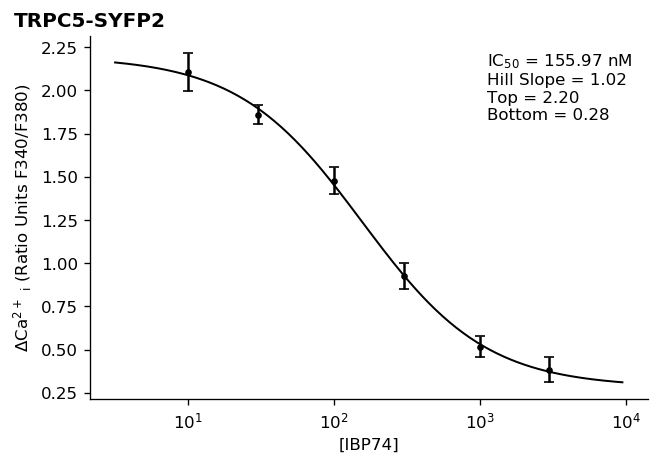

In [16]:
plate1.plot_curve('ic50', activator = '30 nM EA', title = "TRPC5-SYFP2", use_normalised = False, show_top_bot = True,
                 proteins = ['TRPC5'])